In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
import random
from joblib import dump
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itdel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# read data
def load_data():
    data = pd.read_excel('C:/Users/itdel/Documents/Tambun/DBSCAN/Prabowo/datasetprabowo.xlsx')
    return data

In [3]:
data = load_data()
df = data
df

,USER,comment
0,__uchie__,"""Jika nanti kita bertemu kembali dan setiap ka..."
1,bakti2717,Sehat selalu Pak Prabowo ..semoga menjadi peng...
2,alby09109,Mimpi
3,ichal_collins,Bismillah Anies Presiden RI 2024..
4,imansanusi1111,Hamparan kami bapa istirahat.aja Kasih pa Ganj...
...,...,...
206680,beckheribun,Ganjar dan Prabowo 😎🤗😇....Amin🙏
206681,mvnafri,Di facebook juga tempo dot com yg saya baca be...
206682,alfakirani,@tempodotco mau jadi media seperti lampu merah?
206683,zalmi_hendrico,Kalang kabut kalau pak Anis jd presiden 🤣🤣🤣


### Data Cleaning

In [4]:
# Drop attribut
df = df.drop('USER', axis=1)
df.head(5)

,comment
0,"""Jika nanti kita bertemu kembali dan setiap ka..."
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...
2,Mimpi
3,Bismillah Anies Presiden RI 2024..
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...


In [5]:
import re
import numpy as np

def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    return text

# Mengubah kolom 'comment' menjadi tipe data string
df['comment'] = df['comment'].astype(str)

# Menerapkan fungsi remove_pattern pada kolom 'comment' dan menyimpan hasilnya ke kolom 'clean_comment'
df['comment_cl1'] = np.vectorize(remove_pattern)(df['comment'], " *RT* | *@[\w]*")

# Menampilkan beberapa baris teratas dari DataFrame
df.head()

,comment,comment_cl1
0,"""Jika nanti kita bertemu kembali dan setiap ka...","""Jika nanti kita bertemu kembali dan setiap ka..."
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo ..semoga menjadi peng...
2,Mimpi,Mimpi
3,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI 2024..
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat.aja Kasih pa Ganj...


In [6]:
# remove simbol/character
def remove(text):
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return text
df['comment_cl2'] = df['comment_cl1'].apply(lambda x: remove(x))
df.head()

,comment,comment_cl1,comment_cl2
0,"""Jika nanti kita bertemu kembali dan setiap ka...","""Jika nanti kita bertemu kembali dan setiap ka...",Jika nanti kita bertemu kembali dan setiap kat...
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo semoga menjadi pengga...
2,Mimpi,Mimpi,Mimpi
3,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI 2024
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...


In [7]:
# remove
def remove(tweet):
    #remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)

    #remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    #remove hastags, only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    return tweet
df['comment_cl3'] = df['comment_cl2'].apply(lambda x: remove(x))
df.head()

,comment,comment_cl1,comment_cl2,comment_cl3
0,"""Jika nanti kita bertemu kembali dan setiap ka...","""Jika nanti kita bertemu kembali dan setiap ka...",Jika nanti kita bertemu kembali dan setiap kat...,Jika nanti kita bertemu kembali dan setiap kat...
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo semoga menjadi pengga...,Sehat selalu Pak Prabowo semoga menjadi pengga...
2,Mimpi,Mimpi,Mimpi,Mimpi
3,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI 2024,Bismillah Anies Presiden RI
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...


### Teks Preprocessing

##### Lowercasing

In [8]:
# lowercasing
df.drop(["comment_cl1"], axis=1, inplace=True) 

df['Text_lower'] = df['comment_cl3'].str.lower()
df

,comment,comment_cl2,comment_cl3,Text_lower
0,"""Jika nanti kita bertemu kembali dan setiap ka...",Jika nanti kita bertemu kembali dan setiap kat...,Jika nanti kita bertemu kembali dan setiap kat...,jika nanti kita bertemu kembali dan setiap kat...
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo semoga menjadi pengga...,Sehat selalu Pak Prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...
2,Mimpi,Mimpi,Mimpi,mimpi
3,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI 2024,Bismillah Anies Presiden RI,bismillah anies presiden ri
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...,hamparan kami bapa istirahat aja kasih pa ganj...
...,...,...,...,...
206680,Ganjar dan Prabowo 😎🤗😇....Amin🙏,Ganjar dan Prabowo Amin,Ganjar dan Prabowo Amin,ganjar dan prabowo amin
206681,Di facebook juga tempo dot com yg saya baca be...,Di facebook juga tempo dot com yg saya baca be...,Di facebook juga tempo dot com yg saya baca be...,di facebook juga tempo dot com yg saya baca be...
206682,@tempodotco mau jadi media seperti lampu merah?,mau jadi media seperti lampu merah,mau jadi media seperti lampu merah,mau jadi media seperti lampu merah
206683,Kalang kabut kalau pak Anis jd presiden 🤣🤣🤣,Kalang kabut kalau pak Anis jd presiden,Kalang kabut kalau pak Anis jd presiden,kalang kabut kalau pak anis jd presiden


#### Stopword Removal

In [9]:
# Menambah kamus stopword yang belum ada di python sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_factory = StopWordRemoverFactory().get_stop_words()
more_stopwords = [
    'yg', 'utk', 'cuman', 'deh', 'Btw', 'tapi', 'gua', 'gue', 'lo', 'lu',
    'kalo', 'trs', 'jd', 'nih', 'ntar', 'nya', 'lg', 'gk', 'ecusli', 'dpt',
    'dr', 'kpn', 'kok', 'kyk', 'donk', 'yah', 'u', 'ya', 'ga', 'km', 'eh',
    'sih', 'eh', 'bang', 'br', 'kyk', 'rp', 'jt', 'kan', 'gpp', 'sm', 'usah',
    'mas', 'sob', 'thx', 'ato', 'jg', 'gw', 'wkwk', 'mak', 'haha', 'iy', 'k',
    'tp', 'haha', 'dg', 'dri', 'duh', 'ye', 'wkwkwk', 'syg', 'btw',
    'nerjemahan', 'gaes', 'guys', 'moga', 'kmrn', 'nemu', 'yukkk',
    'wkwkw', 'klas', 'iu', 'ew', 'lho', 'sbnry', 'org', 'gtu', 'bwt',
    'klrga', 'clau', 'lbh', 'cpet', 'ku', 'uke', 'mba', 'mas', 'sdh', 'kmrn',
    'oi', 'spt', 'dlm', 'bs', 'krn', 'jgn', 'sapa', 'spt', 'sh', 'wakakaka',
    'sihhh', 'hehe', 'ih', 'dgn', 'la', 'kl', 'ttg', 'mana', 'kmna', 'kmn',
    'tdk', 'tuh', 'dah', 'kek', 'ko', 'pls', 'bbrp', 'pd', 'mah', 'dhhh',
    'kpd', 'tuh', 'kzl', 'byar', 'si', 'sii', 'cm', 'sy', 'hahahaha', 'weh',
    'dlu', 'tuhh'
]

data = stop_factory + more_stopwords
dictionary = ArrayDictionary(data)
stp = StopWordRemover(dictionary)

df["Text_wo_stop"] = df["Text_lower"].apply(lambda text: stp.remove(text))
df

,comment,comment_cl2,comment_cl3,Text_lower,Text_wo_stop
0,"""Jika nanti kita bertemu kembali dan setiap ka...",Jika nanti kita bertemu kembali dan setiap kat...,Jika nanti kita bertemu kembali dan setiap kat...,jika nanti kita bertemu kembali dan setiap kat...,nanti bertemu kata keluar mulutku terdengar bi...
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo semoga menjadi pengga...,Sehat selalu Pak Prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...
2,Mimpi,Mimpi,Mimpi,mimpi,mimpi
3,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI 2024,Bismillah Anies Presiden RI,bismillah anies presiden ri,bismillah anies presiden ri
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...,hamparan kami bapa istirahat aja kasih pa ganj...,hamparan bapa istirahat aja kasih pa ganjar pr...
...,...,...,...,...,...
206680,Ganjar dan Prabowo 😎🤗😇....Amin🙏,Ganjar dan Prabowo Amin,Ganjar dan Prabowo Amin,ganjar dan prabowo amin,ganjar prabowo amin
206681,Di facebook juga tempo dot com yg saya baca be...,Di facebook juga tempo dot com yg saya baca be...,Di facebook juga tempo dot com yg saya baca be...,di facebook juga tempo dot com yg saya baca be...,facebook tempo dot com saya baca beritanya itu
206682,@tempodotco mau jadi media seperti lampu merah?,mau jadi media seperti lampu merah,mau jadi media seperti lampu merah,mau jadi media seperti lampu merah,mau jadi media lampu merah
206683,Kalang kabut kalau pak Anis jd presiden 🤣🤣🤣,Kalang kabut kalau pak Anis jd presiden,Kalang kabut kalau pak Anis jd presiden,kalang kabut kalau pak anis jd presiden,kalang kabut kalau pak anis presiden


##### Tokenisasi

In [10]:
import string
from nltk.tokenize import TweetTokenizer

# Tokenization
def tokenize_tweets(tweet):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    return tweet_tokens

# Apply tokenisasi
df['tokenisasi'] = df['Text_wo_stop'].apply(lambda x: tokenize_tweets(x))
df.head(5)

,comment,comment_cl2,comment_cl3,Text_lower,Text_wo_stop,tokenisasi
0,"""Jika nanti kita bertemu kembali dan setiap ka...",Jika nanti kita bertemu kembali dan setiap kat...,Jika nanti kita bertemu kembali dan setiap kat...,jika nanti kita bertemu kembali dan setiap kat...,nanti bertemu kata keluar mulutku terdengar bi...,"[nanti, bertemu, kata, keluar, mulutku, terden..."
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo semoga menjadi pengga...,Sehat selalu Pak Prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...,"[sehat, selalu, pak, prabowo, semoga, menjadi,..."
2,Mimpi,Mimpi,Mimpi,mimpi,mimpi,[mimpi]
3,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI 2024,Bismillah Anies Presiden RI,bismillah anies presiden ri,bismillah anies presiden ri,"[bismillah, anies, presiden, ri]"
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...,hamparan kami bapa istirahat aja kasih pa ganj...,hamparan bapa istirahat aja kasih pa ganjar pr...,"[hamparan, bapa, istirahat, aja, kasih, pa, ga..."


##### Stemming

In [11]:
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# happy emoticon
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'X-p', 'Xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
])
# sad emoticon
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
])
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)


# Stemming
def stem_tweets(tweet_tokens):
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in data and # remove stopwords
              word not in emoticons and # remove emoticons
              word not in string.punctuation): # remove punctuation
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean

# Apply stemming
df.drop(["comment_cl2"], axis=1, inplace=True)
df['stemming'] = df['tokenisasi'].apply(lambda x: stem_tweets(x))

# Show the resulting DataFrame
df.head()

,comment,comment_cl3,Text_lower,Text_wo_stop,tokenisasi,stemming
0,"""Jika nanti kita bertemu kembali dan setiap ka...",Jika nanti kita bertemu kembali dan setiap kat...,jika nanti kita bertemu kembali dan setiap kat...,nanti bertemu kata keluar mulutku terdengar bi...,"[nanti, bertemu, kata, keluar, mulutku, terden...","[temu, kata, keluar, mulut, dengar, bijak, smp..."
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...,"[sehat, selalu, pak, prabowo, semoga, menjadi,...","[sehat, selalu, pak, prabowo, moga, jadi, gant..."
2,Mimpi,Mimpi,mimpi,mimpi,[mimpi],[mimpi]
3,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI,bismillah anies presiden ri,bismillah anies presiden ri,"[bismillah, anies, presiden, ri]","[bismillah, anies, presiden, ri]"
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...,hamparan kami bapa istirahat aja kasih pa ganj...,hamparan bapa istirahat aja kasih pa ganjar pr...,"[hamparan, bapa, istirahat, aja, kasih, pa, ga...","[hampar, bapa, istirahat, aja, kasih, pa, ganj..."


##### Remove Punctuation

In [12]:
# remove punct
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text
df['comments'] = df['stemming'].apply(lambda x: remove_punct(x))
df.head()

,comment,comment_cl3,Text_lower,Text_wo_stop,tokenisasi,stemming,comments
0,"""Jika nanti kita bertemu kembali dan setiap ka...",Jika nanti kita bertemu kembali dan setiap kat...,jika nanti kita bertemu kembali dan setiap kat...,nanti bertemu kata keluar mulutku terdengar bi...,"[nanti, bertemu, kata, keluar, mulutku, terden...","[temu, kata, keluar, mulut, dengar, bijak, smp...",temu kata keluar mulut dengar bijak smp teling...
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...,"[sehat, selalu, pak, prabowo, semoga, menjadi,...","[sehat, selalu, pak, prabowo, moga, jadi, gant...",sehat selalu pak prabowo moga jadi ganti pak j...
2,Mimpi,Mimpi,mimpi,mimpi,[mimpi],[mimpi],mimpi
3,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI,bismillah anies presiden ri,bismillah anies presiden ri,"[bismillah, anies, presiden, ri]","[bismillah, anies, presiden, ri]",bismillah anies presiden ri
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...,hamparan kami bapa istirahat aja kasih pa ganj...,hamparan bapa istirahat aja kasih pa ganjar pr...,"[hamparan, bapa, istirahat, aja, kasih, pa, ga...","[hampar, bapa, istirahat, aja, kasih, pa, ganj...",hampar bapa istirahat aja kasih pa ganjar pran...


In [13]:
# remove comment kosong
df = df[df['comments']!='']

# reset index
df = df.reset_index(drop=True)
df.head()

,comment,comment_cl3,Text_lower,Text_wo_stop,tokenisasi,stemming,comments
0,"""Jika nanti kita bertemu kembali dan setiap ka...",Jika nanti kita bertemu kembali dan setiap kat...,jika nanti kita bertemu kembali dan setiap kat...,nanti bertemu kata keluar mulutku terdengar bi...,"[nanti, bertemu, kata, keluar, mulutku, terden...","[temu, kata, keluar, mulut, dengar, bijak, smp...",temu kata keluar mulut dengar bijak smp teling...
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,Sehat selalu Pak Prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...,sehat selalu pak prabowo semoga menjadi pengga...,"[sehat, selalu, pak, prabowo, semoga, menjadi,...","[sehat, selalu, pak, prabowo, moga, jadi, gant...",sehat selalu pak prabowo moga jadi ganti pak j...
2,Mimpi,Mimpi,mimpi,mimpi,[mimpi],[mimpi],mimpi
3,Bismillah Anies Presiden RI 2024..,Bismillah Anies Presiden RI,bismillah anies presiden ri,bismillah anies presiden ri,"[bismillah, anies, presiden, ri]","[bismillah, anies, presiden, ri]",bismillah anies presiden ri
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,Hamparan kami bapa istirahat aja Kasih pa Ganj...,hamparan kami bapa istirahat aja kasih pa ganj...,hamparan bapa istirahat aja kasih pa ganjar pr...,"[hamparan, bapa, istirahat, aja, kasih, pa, ga...","[hampar, bapa, istirahat, aja, kasih, pa, ganj...",hampar bapa istirahat aja kasih pa ganjar pran...


In [14]:
# remove kolom
df.drop(df.columns[[1,2,3,4,5]], axis = 1, inplace = True)
df.head()

,comment,comments
0,"""Jika nanti kita bertemu kembali dan setiap ka...",temu kata keluar mulut dengar bijak smp teling...
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,sehat selalu pak prabowo moga jadi ganti pak j...
2,Mimpi,mimpi
3,Bismillah Anies Presiden RI 2024..,bismillah anies presiden ri
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,hampar bapa istirahat aja kasih pa ganjar pran...


In [15]:
# Menghapus baris dengan nilai NaN dalam kolom 'comments'
df = df.dropna(subset=['comments'])

In [16]:
# save clean data to file
df.to_csv('C:/Users/itdel/Documents/Tambun/DBSCAN/Prabowo/DataBersihPrabowo.csv', encoding='utf8', index=False)

### Clustering DBSCAN

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score

In [2]:
def load_lexicon_lexis(file_path):
    words = []
    scores = []
    with open(file_path, 'r') as file:
        for line in file:
            data = line.strip().split(' ')
            if len(data) >= 2:
                word = data[0].strip()
                score = int(data[1].strip())
                words.append(word)
                scores.append(score)
    return dict(zip(words, scores))

In [3]:
# memuat kamus sentimen
lexicon = load_lexicon_lexis('E:/Documents/Semester 8/TAmbun/Sidang/DBSCAN/Prabowo/kamus.txt')

In [4]:
df = pd.read_csv('E:/Documents/Semester 8/TAmbun/Sidang/DBSCAN/Prabowo/DataBersihPrabowo.csv') 
df.head()

,comment,comments
0,"""Jika nanti kita bertemu kembali dan setiap ka...",temu kata keluar mulut dengar bijak smp teling...
1,Sehat selalu Pak Prabowo ..semoga menjadi peng...,sehat selalu pak prabowo moga jadi ganti pak j...
2,Mimpi,mimpi
3,Bismillah Anies Presiden RI 2024..,bismillah anies presiden ri
4,Hamparan kami bapa istirahat.aja Kasih pa Ganj...,hampar bapa istirahat aja kasih pa ganjar pran...


In [5]:
# tambahkan kolom untuk menyimpan skor sentiment
df['sentiment_score'] = 0

In [6]:
df['comments'] = df['comments'].fillna('').astype(str) # mengganti nilai NaN dan mengubah tipe data menjadi string
for i, row in df.iterrows():
    words = row['comments'].split()
    score = sum([lexicon.get(word, 0) for word in words])
    df.at[i, 'sentiment_score'] = score

In [7]:
df = df.dropna(subset=['comments'])

In [8]:
# transformasi tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1,2))
X = tfidf_vectorizer.fit_transform(df['comments'])

In [9]:
display(X)

<183998x166151 sparse matrix of type '<class 'numpy.float64'>'
	with 2430641 stored elements in Compressed Sparse Row format>

#### Clustering

In [10]:
# menentukan parameter DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=9, metric='euclidean')

In [11]:
# mendapatkan label kelompok untuk setiap data
labels = dbscan.fit_predict(X)

In [12]:
# mendapatkan jumlah kelompok yang terbentuk
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Jumlah kelompok: ", n_clusters)

Jumlah kelompok:  2349


In [50]:
# mengubah data hasil clustering ke dalam format DataFrame
df_clustered = pd.DataFrame({'comments': df['comments'], 'cluster': labels})

##### Evaluation With Silhouette Coefficient


In [51]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [52]:
# generate sample data
X, y = make_blobs(n_samples=183984, centers=3, random_state=42)

In [ ]:
# menghitung silhouette score
score = silhouette_score(X, labels)
print("Silhouette score:", score)

Silhouette score: -0.6474915629861729


In [71]:
#menampilkan hasil clustering
df['cluster'] = labels

# Display the number of data points in each cluster
print(df.groupby(['cluster']).count())

         comment  comments  sentiment_score
cluster                                    
-1        129014    129014           129014
 0            57        57               57
 1            81        81               81
 2           985       985              985
 3            40        40               40
...          ...       ...              ...
 2344         12        12               12
 2345         12        12               12
 2346         12        12               12
 2347         12        12               12
 2348          9         9                9

[2350 rows x 3 columns]


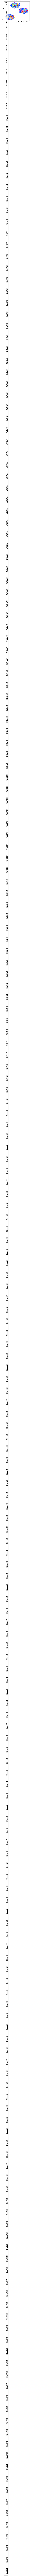

In [72]:
import seaborn as sns

# membuat DataFrame untuk data dan label kelompok
df_cluster = pd.DataFrame(X, columns=['x1', 'x2'])
df_cluster['cluster'] = labels

# membuat plot menggunakan seaborn
sns.scatterplot(x='x1', y='x2', data=df_cluster, hue='cluster', palette='bright')
plt.title(f"Clustering hasil DBSCAN dengan {n_clusters} kelompok")
plt.show()

##### Ekstrak 10 Top Kata 

In [73]:
import numpy as np

# Menghitung jarak rata-rata dari setiap titik dalam kluster ke titik referensi dalam kluster tersebut
def cluster_center_distance(X, labels, cluster_id):
    cluster_points = X[labels == cluster_id]
    center = np.mean(cluster_points, axis=0)
    distances = np.linalg.norm(cluster_points - center, axis=1)
    return distances

# Menghitung jarak antara setiap dokumen dan pusat kluster dalam konteks DBSCAN
distances = np.zeros((X.shape[0],)) # Inisialisasi matriks jarak
for cluster_id in range(n_clusters):
    cluster_distances = cluster_center_distance(X, labels, cluster_id)
    distances[labels == cluster_id] = cluster_distances

# Untuk setiap cluster yang terbentuk, ambil 10 kata teratas dan identifikasi nilai sentimennya
for cluster_id in range(n_clusters):
    cluster_words = []
    for doc_id, label in enumerate(labels):
        if label == cluster_id:
            words = df.iloc[doc_id]['comments'].split()
            cluster_words.extend(words)
    top_words = pd.Series(cluster_words).value_counts().head(10)
    top_words_scores = [lexicon.get(word, 0) for word in top_words.index]
    print(f"Cluster {cluster_id} Top 10 words: {', '.join(top_words.index)}")
    print(f"Sentiment Scores: {', '.join(map(str, top_words_scores))}")


Cluster 0 Top 10 words: mimpi, wkwkwkkwkkwwk
Sentiment Scores: -3, 0
Cluster 1 Top 10 words: tetap, prabowo
Sentiment Scores: 3, 0
Cluster 2 Top 10 words: prabowopresiden
Sentiment Scores: 0
Cluster 3 Top 10 words: bismillah, pak, prabowo, presiden, ri
Sentiment Scores: 0, 0, 0, 1, 0
Cluster 4 Top 10 words: prabowo, fori
Sentiment Scores: 0, 0
Cluster 5 Top 10 words: baik
Sentiment Scores: 2
Cluster 6 Top 10 words: idola
Sentiment Scores: 4
Cluster 7 Top 10 words: bismillah
Sentiment Scores: 0
Cluster 8 Top 10 words: maju, pak, prabowo
Sentiment Scores: 3, 0, 0
Cluster 9 Top 10 words: insyaallah, anies, baswedan, presiden, ri
Sentiment Scores: 4, 0, 0, 1, 0
Cluster 10 Top 10 words: aamiin
Sentiment Scores: 0
Cluster 11 Top 10 words: capres, abadi
Sentiment Scores: 3, 2
Cluster 12 Top 10 words: prabowo, presiden, allahuakhbar
Sentiment Scores: 0, 1, 0
Cluster 13 Top 10 words: sehat, selalu, bapak, tri, tahan, prabowo, subianto, presiden, ri, amin
Sentiment Scores: 2, 0, 0, 0, -4, 0, 0, 

Cluster 101 Top 10 words: bapak, sampekah, editaann, fotoo
Sentiment Scores: 0, 0, 0, 0
Cluster 102 Top 10 words: sama
Sentiment Scores: 3
Cluster 103 Top 10 words: panutan, q
Sentiment Scores: 4, 0
Cluster 104 Top 10 words: prabowo, mahfud, x, pak
Sentiment Scores: 0, 0, 0, 0
Cluster 105 Top 10 words: luar, biasa
Sentiment Scores: 0, 1
Cluster 106 Top 10 words: masyaa, allah
Sentiment Scores: 0, 5
Cluster 107 Top 10 words: subhanallah
Sentiment Scores: 0
Cluster 108 Top 10 words: lanjut, pak, prabowo, presiden
Sentiment Scores: 3, 0, 0, 1
Cluster 109 Top 10 words: masya, allah
Sentiment Scores: 0, 5
Cluster 110 Top 10 words: masyaallah
Sentiment Scores: 0
Cluster 111 Top 10 words: anies, presiden, p
Sentiment Scores: 0, 1, 0
Cluster 112 Top 10 words: prabowo, yess
Sentiment Scores: 0, 4
Cluster 113 Top 10 words: nyata
Sentiment Scores: 2
Cluster 114 Top 10 words: aamiin, allahumma
Sentiment Scores: 0, 0
Cluster 115 Top 10 words: bodo, prabowo
Sentiment Scores: -3, 0
Cluster 116 Top 10

Cluster 213 Top 10 words: hoax, wwkwk
Sentiment Scores: -2, 0
Cluster 214 Top 10 words: abal, survey, bayar, wkwkwkw, muak
Sentiment Scores: 0, 3, -2, 0, -4
Cluster 215 Top 10 words: prabowo, yesss
Sentiment Scores: 0, 4
Cluster 216 Top 10 words: pa, anies, baswedan, t
Sentiment Scores: 0, 0, 0, 0
Cluster 217 Top 10 words: anis, pilih
Sentiment Scores: 0, 4
Cluster 218 Top 10 words: odgj
Sentiment Scores: 0
Cluster 219 Top 10 words: pak, anies, baswedan
Sentiment Scores: 0, 0, 0
Cluster 220 Top 10 words: tetap, anies
Sentiment Scores: 3, 0
Cluster 221 Top 10 words: ganjar, prabowo, mensng
Sentiment Scores: 0, 0, 0
Cluster 222 Top 10 words: survei, dmnaaa, indometehalu, spidometer
Sentiment Scores: 0, 0, 0, 0
Cluster 223 Top 10 words: survey, hoax, indonesiasekarangmenjadinegarahoax
Sentiment Scores: 3, -2, 0
Cluster 224 Top 10 words: jokowi, janchuxxx, i
Sentiment Scores: 0, 0, 0
Cluster 225 Top 10 words: ganjar, yes, pak, alhamdulillah
Sentiment Scores: 0, 4, 0, 0
Cluster 226 Top 10 w

Cluster 327 Top 10 words: gagah, sekali, pak
Sentiment Scores: 0, 0, 0
Cluster 328 Top 10 words: no, prabowo
Sentiment Scores: -3, 0
Cluster 329 Top 10 words: assalamualaikum
Sentiment Scores: 0
Cluster 330 Top 10 words: bissmillah, presiden, ri
Sentiment Scores: 0, 1, 0
Cluster 331 Top 10 words: bismillah, prabowo, presiden, gerindra, menang, p
Sentiment Scores: 0, 0, 1, 0, 2, 0
Cluster 332 Top 10 words: prabowo, presiden, indonesia, pak
Sentiment Scores: 0, 1, 0, 0
Cluster 333 Top 10 words: kelasss
Sentiment Scores: 0
Cluster 334 Top 10 words: pak, presiden, aamiin
Sentiment Scores: 0, 1, 0
Cluster 335 Top 10 words: sehat, selalu, pak, menhan
Sentiment Scores: 2, 0, 0, 0
Cluster 336 Top 10 words: presiden, pak, prabowo, r
Sentiment Scores: 1, 0, 0, 0
Cluster 337 Top 10 words: pak, pilih, baik
Sentiment Scores: 0, 4, 2
Cluster 338 Top 10 words: gaspol, pak, prabowo, presiden
Sentiment Scores: 0, 0, 0, 1
Cluster 339 Top 10 words: bismillah, pak, presiden, ri
Sentiment Scores: 0, 0, 1, 

Cluster 428 Top 10 words: mantap, keren
Sentiment Scores: 5, 2
Cluster 429 Top 10 words: mantap, pakk
Sentiment Scores: 5, 0
Cluster 430 Top 10 words: prabowo, jadi, presiden, ri, amanah, pak, bapak
Sentiment Scores: 0, 4, 1, 0, 0, 0, 0
Cluster 431 Top 10 words: presiden, bismillah
Sentiment Scores: 1, 0
Cluster 432 Top 10 words: pak, presiden, menang, aamiin, allah, prabowopresiden, gerindramenang
Sentiment Scores: 0, 1, 2, 0, 5, 0, 0
Cluster 433 Top 10 words: moga, jadi, presiden, ri
Sentiment Scores: 3, 4, 1, 0
Cluster 434 Top 10 words: pilih, pak, x, jokowi, besok, prabowo
Sentiment Scores: 4, 0, 0, 0, 0, 0
Cluster 435 Top 10 words: moga, bapak, sehat, selalu
Sentiment Scores: 3, 0, 2, 0
Cluster 436 Top 10 words: merah, putih
Sentiment Scores: -2, 3
Cluster 437 Top 10 words: pak, sehat, selalu
Sentiment Scores: 0, 2, 0
Cluster 438 Top 10 words: mantap, pakkk
Sentiment Scores: 5, 0
Cluster 439 Top 10 words: juara, gerindran
Sentiment Scores: 0, 0
Cluster 440 Top 10 words: alhamdulil

Cluster 529 Top 10 words: prabowo, mahfud, gasss
Sentiment Scores: 0, 0, 0
Cluster 530 Top 10 words: prabowo, sekali, tetap
Sentiment Scores: 0, 0, 3
Cluster 531 Top 10 words: prabowo, gibran, capres, cawapres
Sentiment Scores: 0, 0, 3, 1
Cluster 532 Top 10 words: next, r
Sentiment Scores: 3, 0
Cluster 533 Top 10 words: kelazz
Sentiment Scores: 0
Cluster 534 Top 10 words: bro, avnavunu
Sentiment Scores: 0, 0
Cluster 535 Top 10 words: presiden, menang
Sentiment Scores: 1, 2
Cluster 536 Top 10 words: semangat, bapak
Sentiment Scores: 2, 0
Cluster 537 Top 10 words: nice
Sentiment Scores: 0
Cluster 538 Top 10 words: luar, biasa, pak, prabowo, presiden
Sentiment Scores: 0, 1, 0, 0, 1
Cluster 539 Top 10 words: boruto, sasuke
Sentiment Scores: 0, 0
Cluster 540 Top 10 words: all, in, semesta
Sentiment Scores: 0, 0, 0
Cluster 541 Top 10 words: yok
Sentiment Scores: 0
Cluster 542 Top 10 words: mantaf
Sentiment Scores: 0
Cluster 543 Top 10 words: mantap, boss
Sentiment Scores: 5, 0
Cluster 544 To

Cluster 638 Top 10 words: jendraal
Sentiment Scores: 0
Cluster 639 Top 10 words: calon, presiden, idiola
Sentiment Scores: 2, 1, 0
Cluster 640 Top 10 words: tk, kata, jeneng, sae, pak, sehat, njih
Sentiment Scores: 0, 1, 0, 0, 0, 2, 0
Cluster 641 Top 10 words: terima, kasih, mampir, disumbawa, pak
Sentiment Scores: 3, 3, 0, 0, 0
Cluster 642 Top 10 words: next, presiden, ri
Sentiment Scores: 3, 1, 0
Cluster 643 Top 10 words: pak, prabowo, moga, dadi, presiden, nyong, ndukung, lah
Sentiment Scores: 0, 0, 3, 0, 1, 0, 0, 0
Cluster 644 Top 10 words: pimpin, prabowo, air, puluh, anak, bapak, resmi, nikmat, lama, tahun
Sentiment Scores: 2, 0, 0, 0, 0, 0, 3, 4, -2, 0
Cluster 645 Top 10 words: mashaallah
Sentiment Scores: 0
Cluster 646 Top 10 words: bapak, calon, lihat, kemudian, indonesia, pimpin, pantas, paling, kerja, hasil
Sentiment Scores: 0, 2, 1, 0, 0, 2, 3, 0, 3, 3
Cluster 647 Top 10 words: pilih, pak, prabowo, wajib, ri
Sentiment Scores: 4, 0, 0, 1, 0
Cluster 648 Top 10 words: selalu, 

Cluster 718 Top 10 words: the, next, president, bapak, jng, lupa, air, ntt
Sentiment Scores: 3, 3, 1, 0, 0, -2, 0, 0
Cluster 719 Top 10 words: perhati, perintah, akibat, data, maha, picu, fakta, presiden, minta, intelijen
Sentiment Scores: 2, -2, 0, 0, 0, 0, 0, 1, -2, 0
Cluster 720 Top 10 words: gagas, yuk, kerja, yuks, tindak, nyata, cc, bapak, cinta
Sentiment Scores: 0, 0, 3, 0, 3, 2, 0, 0, 3
Cluster 721 Top 10 words: udah, pak, indonesia, aman, tangan, aminn, otw, jadi, macan, asia
Sentiment Scores: 3, 0, 0, 2, 0, 0, 0, 4, 0, 0
Cluster 722 Top 10 words: wah, senang
Sentiment Scores: 4, 2
Cluster 723 Top 10 words: semngt, prnh, baik, balas, swt, allh, smga, lupa, tak, pak
Sentiment Scores: 0, 0, 2, -3, 0, 0, 0, -2, 0, 0
Cluster 724 Top 10 words: you
Sentiment Scores: 0
Cluster 725 Top 10 words: ekspresi, masyarakat, bahagia, temu, pak, lebih, nila, teori, amat, politik
Sentiment Scores: 0, 0, 5, 0, 0, 2, 4, 0, -1, 0
Cluster 726 Top 10 words: kerja, jelas, gak, kaya, orang, saling, si

Cluster 790 Top 10 words: aamiin, yaalloh, semua, do, a, baik, pa, prabowo, mnjdi, presiden
Sentiment Scores: 0, 0, 0, 0, 0, 2, 0, 0, 0, 1
Cluster 791 Top 10 words: betul, alhamdulillah, senantiasa, wa, azza, allah, lindung, selalu, sehat, bapak
Sentiment Scores: 4, 0, 0, 0, 0, 5, 3, 0, 2, 0
Cluster 792 Top 10 words: manusia, baik, manfaat, lain, semangat, pak, prabowo, prabowopresiden, gerindramenang
Sentiment Scores: 0, 2, 2, 0, 2, 0, 0, 0, 0
Cluster 793 Top 10 words: moga, bapa, jadi, presiden, tahun, amin
Sentiment Scores: 3, 0, 4, 1, 0, 3
Cluster 794 Top 10 words: sekali, selalu, kerja, pak, sulit, assalamualaikum, mata, didpn, bumn, proyek
Sentiment Scores: 0, 0, 3, 0, -2, 0, 0, 0, 0, 0
Cluster 795 Top 10 words: sehat, selalu, bapak, presiden, ri, amin
Sentiment Scores: 2, 0, 0, 1, 0, 3
Cluster 796 Top 10 words: masya, allah, berkah, selalu, pak
Sentiment Scores: 0, 5, 0, 0, 0
Cluster 797 Top 10 words: moga, jadi, ladang, pahala, bapak, terimakasih, sehat, selalu, pak, bismillah


Cluster 865 Top 10 words: mantap, bpk
Sentiment Scores: 5, 0
Cluster 866 Top 10 words: pak, sehat, selalu, biar, pimpin, nkri
Sentiment Scores: 0, 2, 0, 0, 2, 0
Cluster 867 Top 10 words: alhamdulillah, pa
Sentiment Scores: 0, 0
Cluster 868 Top 10 words: aamiin, masya, alloh, sehat, selalu, pak, presiden, indonesia
Sentiment Scores: 0, 0, 0, 2, 0, 0, 1, 0
Cluster 869 Top 10 words: bismillah, r, amin
Sentiment Scores: 0, 0, 3
Cluster 870 Top 10 words: selamat, malam, bapak, tri, pak
Sentiment Scores: 3, 0, 0, 0, 0
Cluster 871 Top 10 words: bismillah, pak, prabowo, menang
Sentiment Scores: 0, 0, 0, 2
Cluster 872 Top 10 words: presidenkuuuhhh
Sentiment Scores: 0
Cluster 873 Top 10 words: ntt, pak
Sentiment Scores: 0, 0
Cluster 874 Top 10 words: fokus, all, in, prabowo
Sentiment Scores: 4, 0, 0, 0
Cluster 875 Top 10 words: masya, allah, trimakasi, bnyak, pak, mau, datang, daerah, sehat, selalu
Sentiment Scores: 0, 5, 0, 0, 0, 4, 0, 0, 2, 0
Cluster 876 Top 10 words: smg, allah, meridhoi, jad

Cluster 952 Top 10 words: andai, besok, bapak, prabowo, jadi, presiden, allah, sungguh, bahagia, diri
Sentiment Scores: 0, 0, 0, 0, 4, 1, 5, 0, 5, -2
Cluster 953 Top 10 words: pak, masya, allah, tabarakallah, bangga, udah, g, sabar, tunggu, nama
Sentiment Scores: 0, 0, 5, 0, 2, 3, 0, 2, -2, 0
Cluster 954 Top 10 words: baru, kelas, calon, presiden
Sentiment Scores: 0, 4, 2, 1
Cluster 955 Top 10 words: da, teks, ipad, lihat
Sentiment Scores: 0, 0, 0, 1
Cluster 956 Top 10 words: makin, lang, bangsa
Sentiment Scores: 0, 0, 0
Cluster 957 Top 10 words: pak, prabowo, layak, jadi, presiden, ri
Sentiment Scores: 0, 0, 4, 4, 1, 0
Cluster 958 Top 10 words: iya, pak, mau, jadi, rawan
Sentiment Scores: 3, 0, 4, 4, 2
Cluster 959 Top 10 words: tadi, denger, lagu, ojo, banding, bandingke, versi, prabowo, emng, asik
Sentiment Scores: 0, 0, 0, 0, -3, 0, 0, 0, 0, 0
Cluster 960 Top 10 words: turut, setia, kelas, memang, beda, peridoe, dukung, bapak
Sentiment Scores: 1, 4, 4, 0, -2, 0, 2, 0
Cluster 961 Top

Cluster 1020 Top 10 words: moga, allah, selalu, serta, pak, prabowo, derap, langkah
Sentiment Scores: 3, 5, 0, 0, 0, 0, 0, 0
Cluster 1021 Top 10 words: papua, dulu, kkb, senyumin, aja, gaess, urusin, kocak
Sentiment Scores: 0, 0, 0, 0, 1, 0, 0, 2
Cluster 1022 Top 10 words: salam, pak, prabowo
Sentiment Scores: 2, 0, 0
Cluster 1023 Top 10 words: jujur, bikin, kagum, peci
Sentiment Scores: 1, 2, 3, 0
Cluster 1024 Top 10 words: best, the, of, my, president
Sentiment Scores: 5, 3, 0, 0, 1
Cluster 1025 Top 10 words: prabowo, mahmud, sangat, layak
Sentiment Scores: 0, 0, 0, 4
Cluster 1026 Top 10 words: makin, ganteng, pak
Sentiment Scores: 0, 2, 0
Cluster 1027 Top 10 words: om, jadi, karna, nu, airlangga, mahfud, partai, kalah, jatim, suara
Sentiment Scores: -4, 4, 0, 0, 0, 0, 0, -2, 0, 0
Cluster 1028 Top 10 words: pak, prabowo, moga, taun, jadu, presiden, ayo, dukung
Sentiment Scores: 0, 0, 3, 0, 0, 1, 0, 2
Cluster 1029 Top 10 words: gaga, betul, regenerasi, presiden, indonesia
Sentiment Sc

Cluster 1110 Top 10 words: sayang, banget, sama, bapak
Sentiment Scores: 2, 1, 3, 0
Cluster 1111 Top 10 words: assalamualaikum, pa, rakyat, kaya, sama, sel, kasih, mati, eksekusi, gausah
Sentiment Scores: 0, 0, 1, 2, 3, 0, 3, -2, -2, 0
Cluster 1112 Top 10 words: guna, temu
Sentiment Scores: -2, 0
Cluster 1113 Top 10 words: didit
Sentiment Scores: 0
Cluster 1114 Top 10 words: bahaya, negara, asai, kuat, militer, hoho, tolak, lupa, tragedi
Sentiment Scores: -2, 0, 0, 2, 0, 3, -2, -2, -3
Cluster 1115 Top 10 words: aku, pak, prabowo, subianto, usir, jakarta, mahasiswa, ikat, anggota, tenang
Sentiment Scores: -2, 0, 0, 0, -3, 0, 0, 0, 1, 2
Cluster 1116 Top 10 words: sadar, budha
Sentiment Scores: 0, 0
Cluster 1117 Top 10 words: beliau, biksu, thailandkah
Sentiment Scores: 0, 0, 0
Cluster 1118 Top 10 words: wah, bante
Sentiment Scores: 4, 0
Cluster 1119 Top 10 words: bpk, pimpin, bangsa, jamin, klo, kira, hina, besaini, layak, subiaco
Sentiment Scores: 0, 2, 0, 2, 0, -3, -3, 0, 4, 0
Cluster 

Cluster 1187 Top 10 words: bantteee, aku, ngepanss, sama, bante
Sentiment Scores: 0, -2, 0, 3, 0
Cluster 1188 Top 10 words: dih, kalah, tengil, aja, undang, menhan
Sentiment Scores: 0, -2, 0, 1, 0, 0
Cluster 1189 Top 10 words: moga, bapak, jadi, presiden, paling, tepat
Sentiment Scores: 3, 0, 4, 1, 0, 0
Cluster 1190 Top 10 words: sada, login
Sentiment Scores: 0, 0
Cluster 1191 Top 10 words: pak, prabowo, mahfud, pilpres, menang, insyaallah
Sentiment Scores: 0, 0, 0, 0, 2, 4
Cluster 1192 Top 10 words: pak, yuh, wih, apik, aja, blunder, milih, wakil
Sentiment Scores: 0, 0, 0, 0, 1, -2, 3, -2
Cluster 1193 Top 10 words: liat, tamu, rumah, senang, bpk, prabowo, jamu, pribadi, beliau, neng
Sentiment Scores: 1, 0, 0, 2, 0, 0, 0, 0, 0, 0
Cluster 1194 Top 10 words: bpk, prabowo, presiden, menang
Sentiment Scores: 0, 0, 1, 2
Cluster 1195 Top 10 words: barokaallah, bapak, sehat, selalu, aamiin
Sentiment Scores: 0, 0, 2, 0, 0
Cluster 1196 Top 10 words: tunggu, pak, cinta, semi, tahun, sekali
Senti

Cluster 1284 Top 10 words: penting, bukan, banteng
Sentiment Scores: 3, 0, 1
Cluster 1285 Top 10 words: sekali, aja
Sentiment Scores: 0, 1
Cluster 1286 Top 10 words: percaya, survey
Sentiment Scores: -2, 3
Cluster 1287 Top 10 words: ganjar, aja
Sentiment Scores: 0, 1
Cluster 1288 Top 10 words: survei, siapa, dolo
Sentiment Scores: 0, 0, 0
Cluster 1289 Top 10 words: siap, dukung
Sentiment Scores: 1, 2
Cluster 1290 Top 10 words: hehehe, thengkyu, kwkwkwkwkwkkwkwkwkwkkwkwkwkwkwkwk
Sentiment Scores: 0, 0, 0
Cluster 1291 Top 10 words: pilih, bapak, x
Sentiment Scores: 4, 0, 0
Cluster 1292 Top 10 words: dukung, bapak
Sentiment Scores: 2, 0
Cluster 1293 Top 10 words: tetap, bapak, prabowo
Sentiment Scores: 3, 0, 0
Cluster 1294 Top 10 words: ganjar, presiden
Sentiment Scores: 0, 1
Cluster 1295 Top 10 words: legowo, kalah, menang
Sentiment Scores: 0, -2, 2
Cluster 1296 Top 10 words: prabowo, hati, pak
Sentiment Scores: 0, 3, 0
Cluster 1297 Top 10 words: dukung
Sentiment Scores: 2
Cluster 1298 T

Sentiment Scores: 0
Cluster 1372 Top 10 words: bapak, anis
Sentiment Scores: 0, 0
Cluster 1373 Top 10 words: ganjarpranowo
Sentiment Scores: 0
Cluster 1374 Top 10 words: rahasia
Sentiment Scores: -1
Cluster 1375 Top 10 words: ganjarrr
Sentiment Scores: 0
Cluster 1376 Top 10 words: anies, for, indonesia, prabowo
Sentiment Scores: 0, 0, 0, 0
Cluster 1377 Top 10 words: aniesforpresidenri
Sentiment Scores: 0
Cluster 1378 Top 10 words: gak, tarik
Sentiment Scores: -2, 1
Cluster 1379 Top 10 words: puan
Sentiment Scores: 0
Cluster 1380 Top 10 words: anies, ahy, pak
Sentiment Scores: 0, 0, 0
Cluster 1381 Top 10 words: anies, for, presiden, pak
Sentiment Scores: 0, 0, 1, 0
Cluster 1382 Top 10 words: prabowo, aja, pak
Sentiment Scores: 0, 1, 0
Cluster 1383 Top 10 words: pilih, min
Sentiment Scores: 4, 0
Cluster 1384 Top 10 words: no, redbull
Sentiment Scores: -3, 0
Cluster 1385 Top 10 words: pak, anies, aja, deuch
Sentiment Scores: 0, 0, 1, 0
Cluster 1386 Top 10 words: pak, ganjar, prabowo
Senti

Cluster 1459 Top 10 words: partai, prabowo, makin, aneh, aja, apa, mau, artis, kaya, pan
Sentiment Scores: 0, 0, 0, -2, 1, 0, 4, 0, 2, 0
Cluster 1460 Top 10 words: pak, anak, ingus, lom, tau, app, politik, rekrut, payah, kayak
Sentiment Scores: 0, 0, -3, 0, 2, 0, 0, 0, 0, 0
Cluster 1461 Top 10 words: sandy, uno, vs, bule
Sentiment Scores: 0, 0, 0, 0
Cluster 1462 Top 10 words: strategi, tarik, pilih, milenial
Sentiment Scores: 0, 1, 4, 0
Cluster 1463 Top 10 words: ngerusak, pamor, gerindra, aja, ngemasukin, bocil
Sentiment Scores: 0, 0, 0, 1, 0, 0
Cluster 1464 Top 10 words: urus, waduuh, aja, blm, diri, apa, mau, rakyat
Sentiment Scores: 0, 0, 1, 0, -2, 0, 4, 1
Cluster 1465 Top 10 words: dul, masuk, pdip, tunggu
Sentiment Scores: 0, 5, 0, -2
Cluster 1466 Top 10 words: apa, rakyat, value, added, banyak, alam, milih, wakil, asal, populer
Sentiment Scores: 0, 1, 0, 0, 3, 0, 3, -2, 0, 2
Cluster 1467 Top 10 words: cari, kader, pelosok, desa, mumpuni, jangan, anak, artis, basi
Sentiment Score

Cluster 1553 Top 10 words: alhamdullah, mantab, dukung, nu, bismillah, pak, prabowo
Sentiment Scores: 0, 4, 2, 0, 0, 0, 0
Cluster 1554 Top 10 words: mantap, pkb, tinggal, tunggu, siapa, damping, prabowo
Sentiment Scores: 5, 0, 2, -2, 0, 0, 0
Cluster 1555 Top 10 words: indonesia, turun, bangsa, asing, asli, ribu, cerdas, pribumi, putri, putra
Sentiment Scores: 0, -2, 0, -2, 3, 2, 2, 0, 0, 0
Cluster 1556 Top 10 words: penting, jangan, yohanes
Sentiment Scores: 3, 0, 0
Cluster 1557 Top 10 words: alhamdulillah, merah
Sentiment Scores: 0, -2
Cluster 1558 Top 10 words: prabowo, presiden, indonesia, moga, pak, pilih, jadi, republic, pilpres, maju
Sentiment Scores: 0, 1, 0, 3, 0, 4, 4, 0, 0, 3
Cluster 1559 Top 10 words: dukung, kalau, prabowo, sama, pak, mafud, md
Sentiment Scores: 2, 0, 0, 3, 0, 0, 0
Cluster 1560 Top 10 words: inshaa, allah, prabowo, jdi, presiden
Sentiment Scores: 0, 5, 0, 0, 1
Cluster 1561 Top 10 words: pilih, dar, kristen, kenan, kurang, kalau, maaf, sana, arah, lama
Senti

Cluster 1640 Top 10 words: wadas
Sentiment Scores: 0
Cluster 1641 Top 10 words: jijik
Sentiment Scores: -4
Cluster 1642 Top 10 words: sampah, makan
Sentiment Scores: -2, 0
Cluster 1643 Top 10 words: banteng, ska, nyerobot
Sentiment Scores: 1, 0, 0
Cluster 1644 Top 10 words: lebih, cinta, diskriminasi, hidup, selalu, jalan, kadang, pak, bahagia, hak
Sentiment Scores: 2, 3, -3, 1, 0, 0, -2, 0, 5, 2
Cluster 1645 Top 10 words: bebas, perintah, wakil, kembali, mui, asi, moderator, jadi, sana, duduk
Sentiment Scores: -2, -2, -2, -2, 0, 0, 0, 4, 0, 0
Cluster 1646 Top 10 words: amiiin, allah
Sentiment Scores: 0, 5
Cluster 1647 Top 10 words: jaya, presiden, bismillah, pro, ma, indonesia, prabowo, subianto, mahfud, md
Sentiment Scores: 0, 1, 0, 0, 0, 0, 0, 0, 0, 0
Cluster 1648 Top 10 words: prabowo, president, yes
Sentiment Scores: 0, 1, 4
Cluster 1649 Top 10 words: moga, menang, pak, prabowo, anies
Sentiment Scores: 3, 2, 0, 0, 0
Cluster 1650 Top 10 words: kalah, takuut
Sentiment Scores: -2, 0


Cluster 1723 Top 10 words: amin, praabowo, presiden, maju, terus, pak, indonesia, cinta, moga, sehat
Sentiment Scores: 3, 0, 1, 3, -1, 0, 0, 3, 3, 2
Cluster 1724 Top 10 words: mantap, pak, tuju, banget
Sentiment Scores: 5, 0, 2, 1
Cluster 1725 Top 10 words: ini, orang, pimpin, benar, bravo, pa, jendral
Sentiment Scores: 0, 1, 2, -2, 3, 0, 0
Cluster 1726 Top 10 words: besar, isi, pesan, sangat, hebat, jiwa, jujur, cocok, ri
Sentiment Scores: 1, 0, 3, 0, 4, 0, 1, 5, 0
Cluster 1727 Top 10 words: doa, panjenengan, jadi, baik
Sentiment Scores: 2, 0, 4, 2
Cluster 1728 Top 10 words: nah, nama, satria, sehat, selalu, pak, prabowo
Sentiment Scores: 0, 0, 0, 2, 0, 0, 0
Cluster 1729 Top 10 words: the, best, for, now
Sentiment Scores: 3, 5, 0, 0
Cluster 1730 Top 10 words: jawa, barat, sumpah, dukung, prabowo, presiden
Sentiment Scores: 0, 0, -2, 2, 0, 1
Cluster 1731 Top 10 words: jiwa, terima, kasih, pak, prabowo, subianto, besar, panutan, kesatria, moga
Sentiment Scores: 0, 3, 3, 0, 0, 0, 1, 4, 0

Cluster 1805 Top 10 words: pak, prabowo, negarawan, sejati
Sentiment Scores: 0, 0, 0, 0
Cluster 1806 Top 10 words: pak, prabowo, maju, dukung
Sentiment Scores: 0, 0, 3, 2
Cluster 1807 Top 10 words: nasionalis, sejati
Sentiment Scores: 0, 0
Cluster 1808 Top 10 words: president, prabowo
Sentiment Scores: 1, 0
Cluster 1809 Top 10 words: baru, presiden
Sentiment Scores: 0, 1
Cluster 1810 Top 10 words: zonk
Sentiment Scores: -5
Cluster 1811 Top 10 words: bravo, prabowo
Sentiment Scores: 3, 0
Cluster 1812 Top 10 words: prabowo, tetap, baik, pak
Sentiment Scores: 0, 3, 2, 0
Cluster 1813 Top 10 words: presiden, umur, hidup, calon, jadi, cuma, cal
Sentiment Scores: 1, 0, 1, 2, 4, -2, 0
Cluster 1814 Top 10 words: moga, sukses
Sentiment Scores: 3, 4
Cluster 1815 Top 10 words: baik
Sentiment Scores: 2
Cluster 1816 Top 10 words: pak, prabowo, jadi, presiden, lanjut, moga
Sentiment Scores: 0, 0, 4, 1, 3, 3
Cluster 1817 Top 10 words: siap, coblos, pa, prabowo
Sentiment Scores: 1, 0, 0, 0
Cluster 1818

Cluster 1893 Top 10 words: wujud, prabowo, sbg, presiden, ri, thn, depan
Sentiment Scores: 0, 0, 0, 1, 0, 0, 0
Cluster 1894 Top 10 words: maju, pk, prabowo, rakyat, butuh, persiden, tegas
Sentiment Scores: 3, 0, 0, 1, -2, 0, 1
Cluster 1895 Top 10 words: iklas, kui, ora, toro, bos
Sentiment Scores: 0, 0, 0, 0, 0
Cluster 1896 Top 10 words: mntaaap, salut, unyuk, p, prabowo, ikhlas, terus, walwpun, klah
Sentiment Scores: 0, 5, 0, 0, 0, 2, -1, 0, 0
Cluster 1897 Top 10 words: prabowo, muhaimin, nasionalis, religius
Sentiment Scores: 0, 0, 0, 0
Cluster 1898 Top 10 words: tuju, gus
Sentiment Scores: 2, 0
Cluster 1899 Top 10 words: ikhlas, seu, indonesia, kalah, pilpres, x, lawan, jokowi, dahsyat, pdip
Sentiment Scores: 2, 0, 0, -2, 0, 0, -3, 0, 5, 0
Cluster 1900 Top 10 words: d, usung, pranowo, jadi, smua, jokowi, jkrta, ahok, anis, waktu
Sentiment Scores: 0, -3, 0, 4, 0, 0, 0, 0, 0, -2
Cluster 1901 Top 10 words: moga, pak, prabowo, subianto, jadi, presiden, amin, x
Sentiment Scores: 3, 0, 0,

Cluster 1963 Top 10 words: selalu, sehat, sukses, pak, prabowo, amin, yra
Sentiment Scores: 0, 2, 4, 0, 0, 3, 0
Cluster 1964 Top 10 words: penting, tetap, pilih, pak, prabowo, subianto, jadi, presiden, ri
Sentiment Scores: 3, 3, 4, 0, 0, 0, 4, 1, 0
Cluster 1965 Top 10 words: tetap, sehat, selalu, bapak, waktu, tuhan, baik, amin
Sentiment Scores: 3, 2, 0, 0, -2, 5, 2, 3
Cluster 1966 Top 10 words: ente, curang, mau, pak, kabinet, masuk, pilpres, emang, palsu, saksi
Sentiment Scores: 0, -3, 4, 0, 0, 5, 0, 2, -2, 0
Cluster 1967 Top 10 words: keluarga, besar, karnis, siap, dukung, bapak, prabowo, subianto, pilpres
Sentiment Scores: 2, 1, 0, 1, 2, 0, 0, 0, 0
Cluster 1968 Top 10 words: uji, pak, prabowo, luar, biasa, beliau, ikhlas, sadar, klu, era
Sentiment Scores: 0, 0, 0, 0, 1, 0, 2, 0, 0, 0
Cluster 1969 Top 10 words: prabowo, vs, mahfud, md, insyaallah, amanah
Sentiment Scores: 0, 0, 0, 0, 4, 0
Cluster 1970 Top 10 words: lanjut, perjuangam, orang, patriot, pantang, nyerah
Sentiment Scores

Cluster 2043 Top 10 words: silah, nikmat, survey, panen, nomer, tuhhh
Sentiment Scores: 0, 4, 3, 0, 0, 0
Cluster 2044 Top 10 words: mantaaap, anies, baswedan, presiden
Sentiment Scores: 0, 0, 0, 1
Cluster 2045 Top 10 words: biasa, lah, siapa, dana, zaman, jkw, biar, atas, kalah, ngamuk
Sentiment Scores: 1, 0, 0, 2, 0, 0, 0, 1, -2, 0
Cluster 2046 Top 10 words: wakil, machfud, tinggal
Sentiment Scores: -2, 0, 2
Cluster 2047 Top 10 words: prabowo, jujur, ikhlas, pro, rakyat
Sentiment Scores: 0, 1, 2, 0, 1
Cluster 2048 Top 10 words: pak, prabowo, memang, baik
Sentiment Scores: 0, 0, 0, 2
Cluster 2049 Top 10 words: tuju, bpk, prabowo, ksatria, sejati
Sentiment Scores: 2, 0, 0, 0, 0
Cluster 2050 Top 10 words: oposisi, rakyat, ngeblangsak
Sentiment Scores: -2, 1, 0
Cluster 2051 Top 10 words: serah, jidat, aja, bro
Sentiment Scores: -2, 0, 1, 0
Cluster 2052 Top 10 words: allhamdulilah, dulu, smpe, skrg, pa, prabowo, ri
Sentiment Scores: 0, 0, 0, 0, 0, 0, 0
Cluster 2053 Top 10 words: survei, ba

Cluster 2123 Top 10 words: bismillahirrokhmanirrokhim, selalu, pilih, pak, prabowo
Sentiment Scores: 0, 0, 4, 0, 0
Cluster 2124 Top 10 words: selamat, semua, manusia, hidup, berahir, pekan, sobat
Sentiment Scores: 3, 0, 0, 1, 0, 0, 0
Cluster 2125 Top 10 words: ganteng, bapak
Sentiment Scores: 2, 0
Cluster 2126 Top 10 words: keren, banget, kalau, lebih, cloese, up
Sentiment Scores: 2, 1, 0, 2, 0, 0
Cluster 2127 Top 10 words: pilih, presiden, beiman, asli, indonesia
Sentiment Scores: 4, 1, 0, 3, 0
Cluster 2128 Top 10 words: presiden, nkri, bpk, prabowo, titik
Sentiment Scores: 1, 0, 0, 0, 1
Cluster 2129 Top 10 words: info, hoodienya, beli, dimanaa
Sentiment Scores: 0, 0, 0, 0
Cluster 2130 Top 10 words: assallammualaikum, bismillahhorrohmannirrohim, insaallah, prabowo, presiden, partai, gerindra, menang
Sentiment Scores: 0, 0, 0, 0, 1, 0, 0, 2
Cluster 2131 Top 10 words: tni, tahan, kuat, jelas, au, perlu, luas, sangat, samudera, wilayah
Sentiment Scores: 0, -4, 2, -2, 0, 0, 0, 0, 0, 2
Clu

Cluster 2204 Top 10 words: hadir, prabowo
Sentiment Scores: 2, 0
Cluster 2205 Top 10 words: wah, sinyal, prabowo, mahfud, banyak
Sentiment Scores: 4, 0, 0, 0, 3
Cluster 2206 Top 10 words: ikut, arah, pak, jokowi
Sentiment Scores: 0, 0, 0, 0
Cluster 2207 Top 10 words: lebay, songong
Sentiment Scores: 0, 0
Cluster 2208 Top 10 words: ganjar, prabowo
Sentiment Scores: 0, 0
Cluster 2209 Top 10 words: juang, pak, prabowo, selamat, serta, lindung, selalu, hamasiakh, yeshua, adonai
Sentiment Scores: 2, 0, 0, 3, 0, 3, 0, 0, 0, 0
Cluster 2210 Top 10 words: keren, president, sekarang, bsa, rasa, salah, bicara, kontestan, ganti
Sentiment Scores: 2, 1, 0, 0, 0, -4, 0, 0, 1
Cluster 2211 Top 10 words: gak, pilih, capres, gagalin, piala, dunia, fix
Sentiment Scores: -2, 4, 3, 0, 0, 5, 2
Cluster 2212 Top 10 words: prabowo, memang, begituu, media, tetap, kawal, pak, titik, darahh, nkri
Sentiment Scores: 0, 0, 0, 0, 3, 0, 0, 1, 0, 0
Cluster 2213 Top 10 words: masak, pak, prabowo, jadi, wakil, tugas, part

Cluster 2279 Top 10 words: tetap, semangat, terimakasih
Sentiment Scores: 3, 2, 0
Cluster 2280 Top 10 words: prajurit, wibawa, bintang
Sentiment Scores: 0, 3, 0
Cluster 2281 Top 10 words: allah, ken, bgt, ketemu, sama, pae
Sentiment Scores: 5, 0, 0, 0, 3, 0
Cluster 2282 Top 10 words: tugas, partai, satu, server, oligarki, jendral, hrs, lebih, beda, presiden
Sentiment Scores: 3, 0, 2, 0, 0, 0, 0, 2, -2, 1
Cluster 2283 Top 10 words: anis, benar, segitunya, bapak, ubah, butuh, rakyat, padahal, coba, sampe
Sentiment Scores: 0, -2, 0, 0, 2, -2, 1, 0, -3, 0
Cluster 2284 Top 10 words: terus, wwkwkwkwk, kalah, bohong, mau, percaya, kiamat, bumi, prabowo, jadi
Sentiment Scores: -1, 0, -2, -3, 4, -2, 0, 0, 0, 4
Cluster 2285 Top 10 words: bravo, indonesia, bapak, presiden, menhan, tangguh, timbuh
Sentiment Scores: 3, 0, 0, 1, 0, 2, 0
Cluster 2286 Top 10 words: satu, frekuensi, apalgi, prabowo, mahfud, woow, jos, gaspool, putar
Sentiment Scores: 2, 0, 0, 0, 0, 0, 0, 0, 0
Cluster 2287 Top 10 words:

##### Menghitung Polarity Dari Setiap Cluster

In [74]:
# hitung rata-rata polarity dari setiap cluster
cluster_sentiment = []
for i in range(n_clusters):
    cluster = df[df['cluster'] == i]
    sentiment_sum = cluster['sentiment_score'].sum()
    num_docs = len(cluster)
    avg_sentiment = sentiment_sum / num_docs
    cluster_sentiment.append(avg_sentiment)
    print("Cluster ", i, " avg sentiment: ", avg_sentiment)


Cluster  0  avg sentiment:  -3.0
Cluster  1  avg sentiment:  3.0
Cluster  2  avg sentiment:  0.0
Cluster  3  avg sentiment:  1.0
Cluster  4  avg sentiment:  0.0
Cluster  5  avg sentiment:  2.0
Cluster  6  avg sentiment:  4.0
Cluster  7  avg sentiment:  0.0
Cluster  8  avg sentiment:  3.0
Cluster  9  avg sentiment:  5.0
Cluster  10  avg sentiment:  0.0
Cluster  11  avg sentiment:  5.0
Cluster  12  avg sentiment:  1.0
Cluster  13  avg sentiment:  2.5
Cluster  14  avg sentiment:  0.0
Cluster  15  avg sentiment:  5.0
Cluster  16  avg sentiment:  1.0
Cluster  17  avg sentiment:  0.0
Cluster  18  avg sentiment:  1.0
Cluster  19  avg sentiment:  8.173913043478262
Cluster  20  avg sentiment:  0.0
Cluster  21  avg sentiment:  0.0
Cluster  22  avg sentiment:  2.0
Cluster  23  avg sentiment:  0.0
Cluster  24  avg sentiment:  1.0
Cluster  25  avg sentiment:  0.0
Cluster  26  avg sentiment:  7.068965517241379
Cluster  27  avg sentiment:  5.0
Cluster  28  avg sentiment:  1.2391304347826086
Cluster  

Cluster  281  avg sentiment:  1.0
Cluster  282  avg sentiment:  0.0
Cluster  283  avg sentiment:  0.0
Cluster  284  avg sentiment:  0.0
Cluster  285  avg sentiment:  2.0
Cluster  286  avg sentiment:  0.0
Cluster  287  avg sentiment:  3.0
Cluster  288  avg sentiment:  4.0
Cluster  289  avg sentiment:  2.0
Cluster  290  avg sentiment:  2.0
Cluster  291  avg sentiment:  1.0
Cluster  292  avg sentiment:  -3.0
Cluster  293  avg sentiment:  2.0
Cluster  294  avg sentiment:  0.0
Cluster  295  avg sentiment:  0.0
Cluster  296  avg sentiment:  2.12
Cluster  297  avg sentiment:  4.0
Cluster  298  avg sentiment:  1.0
Cluster  299  avg sentiment:  5.0
Cluster  300  avg sentiment:  18.555555555555557
Cluster  301  avg sentiment:  0.0
Cluster  302  avg sentiment:  2.0
Cluster  303  avg sentiment:  6.0
Cluster  304  avg sentiment:  0.0
Cluster  305  avg sentiment:  13.0
Cluster  306  avg sentiment:  2.0
Cluster  307  avg sentiment:  1.0
Cluster  308  avg sentiment:  2.0
Cluster  309  avg sentiment:  

Cluster  676  avg sentiment:  4.0
Cluster  677  avg sentiment:  5.2
Cluster  678  avg sentiment:  4.0
Cluster  679  avg sentiment:  0.0
Cluster  680  avg sentiment:  4.0
Cluster  681  avg sentiment:  0.0
Cluster  682  avg sentiment:  5.0
Cluster  683  avg sentiment:  8.0
Cluster  684  avg sentiment:  2.0
Cluster  685  avg sentiment:  8.0
Cluster  686  avg sentiment:  3.0
Cluster  687  avg sentiment:  1.0
Cluster  688  avg sentiment:  2.0
Cluster  689  avg sentiment:  -1.0
Cluster  690  avg sentiment:  9.0
Cluster  691  avg sentiment:  5.0
Cluster  692  avg sentiment:  -2.0
Cluster  693  avg sentiment:  0.0
Cluster  694  avg sentiment:  2.0
Cluster  695  avg sentiment:  2.0
Cluster  696  avg sentiment:  4.0
Cluster  697  avg sentiment:  5.0
Cluster  698  avg sentiment:  6.0
Cluster  699  avg sentiment:  0.0
Cluster  700  avg sentiment:  4.0
Cluster  701  avg sentiment:  1.0
Cluster  702  avg sentiment:  7.0
Cluster  703  avg sentiment:  4.0
Cluster  704  avg sentiment:  2.0
Cluster  705

Cluster  1095  avg sentiment:  -5.0
Cluster  1096  avg sentiment:  -2.0
Cluster  1097  avg sentiment:  2.7333333333333334
Cluster  1098  avg sentiment:  8.0
Cluster  1099  avg sentiment:  10.0
Cluster  1100  avg sentiment:  1.0
Cluster  1101  avg sentiment:  6.0
Cluster  1102  avg sentiment:  10.0
Cluster  1103  avg sentiment:  0.0
Cluster  1104  avg sentiment:  13.0
Cluster  1105  avg sentiment:  -2.0
Cluster  1106  avg sentiment:  3.0
Cluster  1107  avg sentiment:  1.0
Cluster  1108  avg sentiment:  0.0
Cluster  1109  avg sentiment:  10.0
Cluster  1110  avg sentiment:  6.0
Cluster  1111  avg sentiment:  10.0
Cluster  1112  avg sentiment:  -2.0
Cluster  1113  avg sentiment:  0.0
Cluster  1114  avg sentiment:  -4.0
Cluster  1115  avg sentiment:  -4.0
Cluster  1116  avg sentiment:  0.0
Cluster  1117  avg sentiment:  0.0
Cluster  1118  avg sentiment:  4.0
Cluster  1119  avg sentiment:  14.0
Cluster  1120  avg sentiment:  -4.0
Cluster  1121  avg sentiment:  -26.0
Cluster  1122  avg sentim

Cluster  1521  avg sentiment:  2.0
Cluster  1522  avg sentiment:  0.0
Cluster  1523  avg sentiment:  3.0
Cluster  1524  avg sentiment:  -3.0
Cluster  1525  avg sentiment:  0.0
Cluster  1526  avg sentiment:  -2.0
Cluster  1527  avg sentiment:  0.0
Cluster  1528  avg sentiment:  0.0
Cluster  1529  avg sentiment:  0.0
Cluster  1530  avg sentiment:  8.0
Cluster  1531  avg sentiment:  0.0
Cluster  1532  avg sentiment:  3.0
Cluster  1533  avg sentiment:  0.0
Cluster  1534  avg sentiment:  0.0
Cluster  1535  avg sentiment:  -4.0
Cluster  1536  avg sentiment:  0.0
Cluster  1537  avg sentiment:  -1.0
Cluster  1538  avg sentiment:  1.0
Cluster  1539  avg sentiment:  2.0
Cluster  1540  avg sentiment:  1.0
Cluster  1541  avg sentiment:  0.0
Cluster  1542  avg sentiment:  2.0
Cluster  1543  avg sentiment:  3.0
Cluster  1544  avg sentiment:  0.0
Cluster  1545  avg sentiment:  0.0
Cluster  1546  avg sentiment:  0.0
Cluster  1547  avg sentiment:  -2.0
Cluster  1548  avg sentiment:  0.0
Cluster  1549  

Cluster  1963  avg sentiment:  9.0
Cluster  1964  avg sentiment:  15.0
Cluster  1965  avg sentiment:  13.0
Cluster  1966  avg sentiment:  -11.0
Cluster  1967  avg sentiment:  6.0
Cluster  1968  avg sentiment:  3.0
Cluster  1969  avg sentiment:  4.0
Cluster  1970  avg sentiment:  4.0
Cluster  1971  avg sentiment:  2.0
Cluster  1972  avg sentiment:  6.0
Cluster  1973  avg sentiment:  9.0
Cluster  1974  avg sentiment:  4.0
Cluster  1975  avg sentiment:  6.0
Cluster  1976  avg sentiment:  -1.0
Cluster  1977  avg sentiment:  5.0
Cluster  1978  avg sentiment:  4.0
Cluster  1979  avg sentiment:  0.0
Cluster  1980  avg sentiment:  3.0
Cluster  1981  avg sentiment:  0.0
Cluster  1982  avg sentiment:  -2.0
Cluster  1983  avg sentiment:  -2.0
Cluster  1984  avg sentiment:  0.0
Cluster  1985  avg sentiment:  -2.0
Cluster  1986  avg sentiment:  4.0
Cluster  1987  avg sentiment:  5.0
Cluster  1988  avg sentiment:  8.0
Cluster  1989  avg sentiment:  -9.0
Cluster  1990  avg sentiment:  25.0
Cluster  1

##### Menampilkan Hasil Sentimen

In [75]:
# Membuat array sentimen posifif, netral, dan negatif
pos_sentiments = np.arange(1, 6)
neu_sentiments = np.array([0])
neg_sentiments = np.arange(-5, 0)

# Membuat fungsi untuk menghitung jumlah sentimen pada setiap cluster
def count_sentiments(cluster):
    pos_count = len([score for score in cluster if score in pos_sentiments])
    neu_count = len([score for score in cluster if score in neu_sentiments])
    neg_count = len([score for score in cluster if score in neg_sentiments])
    return pos_count, neu_count, neg_count

# Membuat list untuk menyimpan jumlah sentimen positif, netral, dan negatif pada setiap cluster
sentiments = []

for i in range(n_clusters):
    cluster = df[df['cluster'] == i]['sentiment_score']
    pos_count, neu_count, neg_count = count_sentiments(cluster)
    sentiments.append((pos_count, neu_count, neg_count))

# Menampilkan jumlah sentimen positif, netral, dan negatif pada setiap cluster
for i, sentiment in enumerate(sentiments):
    print(f"Cluster {i}: {sentiment[0]} sentimen positif, {sentiment[1]} sentimen netral, {sentiment[2]} sentimen negatif")


Cluster 0: 0 sentimen positif, 0 sentimen netral, 57 sentimen negatif
Cluster 1: 81 sentimen positif, 0 sentimen netral, 0 sentimen negatif
Cluster 2: 0 sentimen positif, 985 sentimen netral, 0 sentimen negatif
Cluster 3: 40 sentimen positif, 0 sentimen netral, 0 sentimen negatif
Cluster 4: 0 sentimen positif, 9 sentimen netral, 0 sentimen negatif
Cluster 5: 270 sentimen positif, 0 sentimen netral, 0 sentimen negatif
Cluster 6: 110 sentimen positif, 0 sentimen netral, 0 sentimen negatif
Cluster 7: 0 sentimen positif, 183 sentimen netral, 0 sentimen negatif
Cluster 8: 58 sentimen positif, 0 sentimen netral, 0 sentimen negatif
Cluster 9: 9 sentimen positif, 0 sentimen netral, 0 sentimen negatif
Cluster 10: 0 sentimen positif, 199 sentimen netral, 0 sentimen negatif
Cluster 11: 20 sentimen positif, 0 sentimen netral, 0 sentimen negatif
Cluster 12: 1493 sentimen positif, 0 sentimen netral, 0 sentimen negatif
Cluster 13: 32 sentimen positif, 0 sentimen netral, 0 sentimen negatif
Cluster 14:

In [76]:
# Mengakumulasi total jumlah sentimen positif, negatif, dan netral dari keseluruhan clusternya
total_pos_count = sum([sentiment[0] for sentiment in sentiments])
total_neu_count = sum([sentiment[1] for sentiment in sentiments])
total_neg_count = sum([sentiment[2] for sentiment in sentiments])

# Menampilkan total jumlah sentimen positif, netral, dan negatif dari keseluruhan clusternya
print(f"Total sentimen positif: {total_pos_count}")
print(f"Total sentimen netral: {total_neu_count}")
print(f"Total sentimen negatif: {total_neg_count}")


Total sentimen positif: 24285
Total sentimen netral: 19147
Total sentimen negatif: 3110


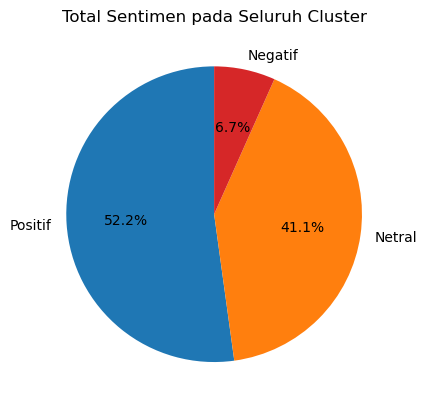

In [77]:
import matplotlib.pyplot as plt

# Menyiapkan data untuk pie chart
labels = ['Positif', 'Netral', 'Negatif']
sizes = [total_pos_count, total_neu_count, total_neg_count]
colors = ['#1f77b4', '#ff7f0e', '#d62728']

# Membuat pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Menambahkan judul pada pie chart
ax.set_title('Total Sentimen pada Seluruh Cluster')

# Menampilkan pie chart
plt.show()
